In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import csv
import torch


In [2]:
def two_stage_hi(twist_point, slope, l):
    hi1_length = int(l * slope)
    hi2_length = l - hi1_length  # 確保總長度等於 l
    hi1 = np.linspace(1, twist_point, hi1_length)
    hi2 = np.linspace(twist_point, 0, hi2_length)
    hi = np.concatenate([hi1, hi2])

    return hi

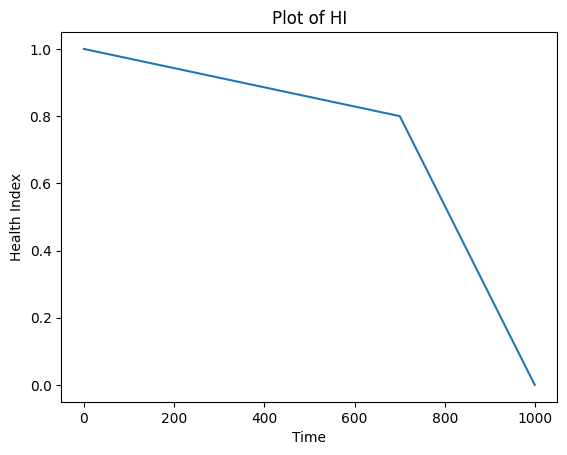

In [20]:
hi = two_stage_hi(0.8, 0.7, 1000)

# 繪製圖表
plt.plot(hi)
plt.xlabel('Time')
plt.ylabel('Health Index')
plt.title('Plot of HI')
plt.show()

In [54]:
time_series = np.sin(np.linspace(0, 100, 200))

def create_dataset(time_series, window_size):
    X, y = [], []
    for i in range(len(time_series) - window_size):
        X.append(time_series[i:i+window_size])
        y.append(time_series[i+window_size])
    return np.array(X), np.array(y)

# 定義窗口大小
window_size = 5
X, y = create_dataset(time_series, window_size)
X.size

975

In [55]:
X = torch.from_numpy(X).float().unsqueeze(-1) # 增加一個維度作為特徵維度

X.size()

torch.Size([195, 5, 1])

In [38]:
time_series

array([ 0.        ,  0.481629  ,  0.84417544,  0.99799984,  0.90506919,
        0.58836056,  0.12618003, -0.36719847, -0.7697873 , -0.98204653,
       -0.95149517, -0.68568702, -0.25034303,  0.24689816,  0.68309389,
        0.95039493,  0.98271122,  0.77205257,  0.37050423, -0.12265112,
       -0.58548103, -0.903551  , -0.99821836, -0.84607664, -0.48474282,
       -0.00355654,  0.4785091 ,  0.84226356,  0.9977687 ,  0.90657594,
        0.59123265,  0.12970734, -0.36388806, -0.76751229, -0.98136942,
       -0.95258337, -0.68827147, -0.25378474,  0.24345017,  0.68049212,
        0.94928268,  0.98336348,  0.77430807,  0.37380531, -0.11912066,
       -0.58259409, -0.90202138, -0.99842425, -0.84796714, -0.4878505 ,
       -0.00711303,  0.47538314,  0.84034102,  0.99752493,  0.90807122,
        0.59409727,  0.13323301, -0.36057305, -0.76522757, -0.98067989,
       -0.95365952, -0.69084722, -0.25722323,  0.2399991 ,  0.67788175,
        0.94815841,  0.9840033 ,  0.77655378,  0.37710166, -0.11

In [41]:
time_series[1+window_size]

0.12618002770661263

In [49]:
X = torch.from_numpy(X).float().unsqueeze(-1) # 增加一個維度作為特徵維度

X.size()

<function Tensor.size>

In [43]:
y

array([ 0.58836056,  0.12618003, -0.36719847, -0.7697873 , -0.98204653,
       -0.95149517, -0.68568702, -0.25034303,  0.24689816,  0.68309389,
        0.95039493,  0.98271122,  0.77205257,  0.37050423, -0.12265112,
       -0.58548103, -0.903551  , -0.99821836, -0.84607664, -0.48474282,
       -0.00355654,  0.4785091 ,  0.84226356,  0.9977687 ,  0.90657594,
        0.59123265,  0.12970734, -0.36388806, -0.76751229, -0.98136942,
       -0.95258337, -0.68827147, -0.25378474,  0.24345017,  0.68049212,
        0.94928268,  0.98336348,  0.77430807,  0.37380531, -0.11912066,
       -0.58259409, -0.90202138, -0.99842425, -0.84796714, -0.4878505 ,
       -0.00711303,  0.47538314,  0.84034102,  0.99752493,  0.90807122,
        0.59409727,  0.13323301, -0.36057305, -0.76522757, -0.98067989,
       -0.95365952, -0.69084722, -0.25722323,  0.2399991 ,  0.67788175,
        0.94815841,  0.9840033 ,  0.77655378,  0.37710166, -0.11558869,
       -0.57969979, -0.90048035, -0.99861752, -0.84984691, -0.49

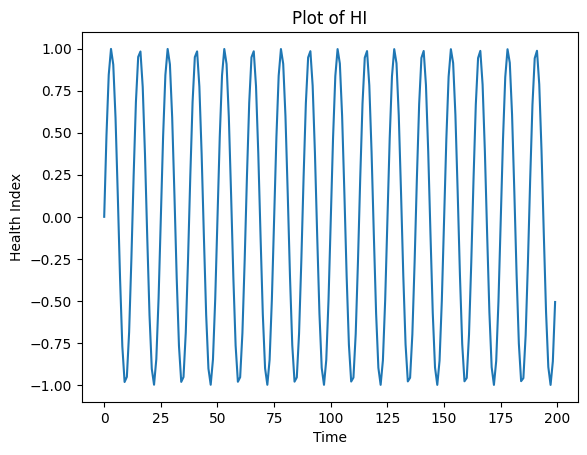

In [27]:
# 繪製圖表
plt.plot(time_series)
plt.xlabel('Time')
plt.ylabel('Health Index')
plt.title('Plot of HI')
plt.show()

In [ ]:
def get_health_index(root_dir, file_path, hi_type=1, two_stage_hp=[0.6, 0.6]):
    bearing_name = os.path.join(root_dir, file_path.split('/')[-2])
    file_num = int(file_path.split('/')[-1].split('_')[-1].split('.')[0])

    folder_tot = 0
    for filename in os.listdir(bearing_name):
        if filename.endswith('.csv'):
            folder_tot += 1
    if hi_type == 1:
        hi = np.linspace(1,0,folder_tot)
    elif hi_type == 2:
        hi = two_stage_hi(two_stage_hp[0],two_stage_hp[1], folder_tot)

    return hi[file_num-1]

Learning_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set'


In [64]:
root_dir = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set'
file_path = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing2_1/acc_00248.csv'
file_num = int(file_path.split('/')[-1].split('_')[-1].split('.')[0])

print(file_num)

248


In [65]:
bearing_name = os.path.join(root_dir, file_path.split('/')[-2])
folder_tot = 0

for filename in os.listdir(bearing_name):
        if filename.endswith('.csv'):
            folder_tot += 1

print(folder_tot)

911
